In [1]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
import sys
from scipy import stats

In [2]:
seaborn.__version__

'0.9.0'

In [3]:
kickstarter_2018 = pandas.read_csv('ks-projects-201801.csv.tar.gz', compression='gzip')

In [4]:
kickstarter_2018.head()

,ks-projects-201801.csv,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1.000002e+09,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0.0,GB,0.0,0.0,1533.95
1,1.000004e+09,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15.0,US,100.0,2421.0,30000.00
2,1.000004e+09,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3.0,US,220.0,220.0,45000.00
3,1.000008e+09,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1.0,US,1.0,1.0,5000.00
4,1.000011e+09,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14.0,US,1283.0,1283.0,19500.00


In [5]:
kickstarter_2018.count()

ks-projects-201801.csv    378661
name                      378657
category                  378661
main_category             378661
currency                  378661
deadline                  378661
goal                      378661
launched                  378661
pledged                   378661
state                     378661
backers                   378661
country                   378661
usd pledged               374864
usd_pledged_real          378661
usd_goal_real             378661
dtype: int64

#### Ejercicio 1:
    
Armar una tabla con todos los proyectos con nombres duplicados, ordenados para revisar agrupados.

In [6]:
dupli = kickstarter_2018[kickstarter_2018.duplicated('name', keep=False)].dropna()
dupli_sort = dupli.sort_values('name')
dupli_sort

,ks-projects-201801.csv,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
342920,8.169983e+08,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-02-09,6500.0,2013-12-19 21:51:50,0.0,canceled,0.0,US,0.00,0.00,6500.00
342692,8.157832e+08,"""...The Last shall be first..."" LODB Lifestyle...",Fashion,Fashion,USD,2014-03-01,6500.0,2014-01-03 20:39:16,37.0,failed,3.0,US,37.00,37.00,6500.00
2024,1.010585e+09,"""A Fresh Start""",Shorts,Film & Video,USD,2011-09-25,3000.0,2011-08-28 21:27:52,3000.0,successful,24.0,US,3000.00,3000.00,3000.00
322671,7.134180e+08,"""A Fresh Start""",Documentary,Film & Video,USD,2013-03-27,5000.0,2013-01-26 03:51:47,1417.0,failed,26.0,US,1417.00,1417.00,5000.00
173036,1.880085e+09,"""American Sports Stories"" - An Athletic Quest",Shorts,Film & Video,USD,2015-08-26,100000.0,2015-06-27 02:02:00,100.0,failed,1.0,US,100.00,100.00,100000.00
265864,4.225097e+08,"""American Sports Stories"" - An Athletic Quest",Television,Film & Video,USD,2017-05-14,100000.0,2017-04-14 00:08:52,1.0,failed,1.0,US,25.00,1.00,100000.00
149726,1.760892e+09,"""City of Mercy"" (Canceled)",Television,Film & Video,USD,2014-08-28,15000.0,2014-07-29 13:12:21,11260.0,canceled,7.0,US,11260.00,11260.00,15000.00
352573,8.662251e+08,"""City of Mercy"" (Canceled)",Film & Video,Film & Video,USD,2015-02-26,20000.0,2015-01-27 19:30:43,7248.0,canceled,9.0,US,7248.00,7248.00,20000.00
125533,1.637335e+09,"""Cut From the Illest Cloth"" - The Brand New Fu...",Hip-Hop,Music,GBP,2014-03-04,14000.0,2014-02-02 16:00:57,225.0,canceled,7.0,GB,369.89,377.33,23478.12
81299,1.413519e+09,"""Cut From the Illest Cloth"" - The Brand New Fu...",Hip-Hop,Music,USD,2014-03-26,9000.0,2014-03-01 19:32:15,1010.0,canceled,25.0,US,1010.00,1010.00,9000.00


#### Ejercicio 2:

Verificar que los proyectos que tienen nombres duplicados también tienen el hash de nombre duplicado

In [7]:
from hashlib import md5

In [8]:
def hashit(val):
    if isinstance(val, float): 
        return str(val)
    return md5(val.encode('utf-8')).hexdigest()

dupli_hash=dupli_sort['name'].apply(hashit)
temp = dupli_sort.assign(hash=lambda x: dupli_hash)#
temp[['name','hash']]

,name,hash
342920,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1
342692,"""...The Last shall be first..."" LODB Lifestyle...",0c7a251ffe4c7834cbc4b04906952ff1
2024,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e
322671,"""A Fresh Start""",67554ab4203d95f2f2f05365f768206e
173036,"""American Sports Stories"" - An Athletic Quest",19a82bc4c5961834282575d07d9b5f7c
265864,"""American Sports Stories"" - An Athletic Quest",19a82bc4c5961834282575d07d9b5f7c
149726,"""City of Mercy"" (Canceled)",b4ca2044f21f67e13ddb7583f59189a7
352573,"""City of Mercy"" (Canceled)",b4ca2044f21f67e13ddb7583f59189a7
125533,"""Cut From the Illest Cloth"" - The Brand New Fu...",24873b2974fe8222256c6cc800a2b361
81299,"""Cut From the Illest Cloth"" - The Brand New Fu...",24873b2974fe8222256c6cc800a2b361


#### Ejercicio 3

Comparar la cantidad de nombres raros en kickstarter_2018 con la que obtenemos al cargar 'ks-projects-201801.csv' con encoding iso-8859-1.

In [9]:
# helpful character encoding module
import chardet
import string
import ftfy.badness as bad

In [10]:
def weird(val):
    if isinstance(val, float): 
        return 0
    return bad.sequence_weirdness(val)

kickstarter_2018['name_weirdness'] = kickstarter_2018['name'].apply(weird)
kickstarter_2018[kickstarter_2018['name_weirdness'] > 1].count()

ks-projects-201801.csv    26
name                      26
category                  26
main_category             26
currency                  26
deadline                  26
goal                      26
launched                  26
pledged                   26
state                     26
backers                   26
country                   26
usd pledged               26
usd_pledged_real          26
usd_goal_real             26
name_weirdness            26
dtype: int64

In [11]:
kickstarter_2018b = pandas.read_csv('ks-projects-201801.csv.tar.gz', compression='gzip', encoding='iso-8859-1')

kickstarter_2018b['name_weirdness'] = kickstarter_2018b['name'].apply(weird)
kickstarter_2018b[kickstarter_2018b['name_weirdness'] > 1].count()

ks-projects-201801.csv    7682
name                      7682
category                  7682
main_category             7682
currency                  7682
deadline                  7682
goal                      7682
launched                  7682
pledged                   7682
state                     7682
backers                   7682
country                   7682
usd pledged               7615
usd_pledged_real          7682
usd_goal_real             7682
name_weirdness            7682
dtype: int64

#### Ejercicio 4

Codificar `currency` con ambas estrategias

In [12]:
from sklearn import preprocessing

In [13]:
kickstarter_2018.describe(include=['O'])

,name,category,main_category,currency,deadline,launched,state,country
count,378657,378661,378661,378661,378661,378661,378661,378661
unique,375764,159,15,14,3164,378089,6,23
top,New EP/Music Development,Product Design,Film & Video,USD,2014-08-08,1970-01-01 01:00:00,failed,US
freq,41,22314,63585,295365,705,7,197719,292627


In [32]:
column='currency'
# Create a label (category) encoder object
le = preprocessing.LabelEncoder()
# Fit the encoder to the pandas column
kickstarter_2018[column]=kickstarter_2018[column].astype('str')
le.fit(kickstarter_2018[column])

LabelEncoder()

In [33]:
# View encoder mapping
dict(zip(le.classes_,le.transform(le.classes_)))

{'AUD': 0,
 'CAD': 1,
 'CHF': 2,
 'DKK': 3,
 'EUR': 4,
 'GBP': 5,
 'HKD': 6,
 'JPY': 7,
 'MXN': 8,
 'NOK': 9,
 'NZD': 10,
 'SEK': 11,
 'SGD': 12,
 'USD': 13,
 'nan': 14}

In [34]:
kickstarter_2018[column] = le.transform(kickstarter_2018[column]) 
kickstarter_2018.head(10)

,ks-projects-201801.csv,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
0,1.000002e+09,The Songs of Adelaide & Abullah,Poetry,Publishing,5,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0.0,GB,0.00,0.00,1533.95,0
1,1.000004e+09,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,13,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15.0,US,100.00,2421.00,30000.00,0
2,1.000004e+09,Where is Hank?,Narrative Film,Film & Video,13,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3.0,US,220.00,220.00,45000.00,0
3,1.000008e+09,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,13,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1.0,US,1.00,1.00,5000.00,0
4,1.000011e+09,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,13,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14.0,US,1283.00,1283.00,19500.00,0
5,1.000014e+09,Monarch Espresso Bar,Restaurants,Food,13,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224.0,US,52375.00,52375.00,50000.00,0
6,1.000023e+09,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,13,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16.0,US,1205.00,1205.00,1000.00,0
7,1.000031e+09,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,13,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40.0,US,453.00,453.00,25000.00,0
8,1.000035e+09,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,13,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58.0,US,8233.00,8233.00,125000.00,0
9,1.000042e+08,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,13,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43.0,US,6240.57,6240.57,65000.00,0


In [35]:
# Reversing encoding
kickstarter_2018[column] = le.inverse_transform(kickstarter_2018[column]) 
kickstarter_2018.head(10)

,ks-projects-201801.csv,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
0,1.000002e+09,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.00,failed,0.0,GB,0.00,0.00,1533.95,0
1,1.000004e+09,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.00,failed,15.0,US,100.00,2421.00,30000.00,0
2,1.000004e+09,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.00,failed,3.0,US,220.00,220.00,45000.00,0
3,1.000008e+09,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.00,failed,1.0,US,1.00,1.00,5000.00,0
4,1.000011e+09,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.00,canceled,14.0,US,1283.00,1283.00,19500.00,0
5,1.000014e+09,Monarch Espresso Bar,Restaurants,Food,USD,2016-04-01,50000.0,2016-02-26 13:38:27,52375.00,successful,224.0,US,52375.00,52375.00,50000.00,0
6,1.000023e+09,Support Solar Roasted Coffee & Green Energy! ...,Food,Food,USD,2014-12-21,1000.0,2014-12-01 18:30:44,1205.00,successful,16.0,US,1205.00,1205.00,1000.00,0
7,1.000031e+09,Chaser Strips. Our Strips make Shots their B*tch!,Drinks,Food,USD,2016-03-17,25000.0,2016-02-01 20:05:12,453.00,failed,40.0,US,453.00,453.00,25000.00,0
8,1.000035e+09,SPIN - Premium Retractable In-Ear Headphones w...,Product Design,Design,USD,2014-05-29,125000.0,2014-04-24 18:14:43,8233.00,canceled,58.0,US,8233.00,8233.00,125000.00,0
9,1.000042e+08,STUDIO IN THE SKY - A Documentary Feature Film...,Documentary,Film & Video,USD,2014-08-10,65000.0,2014-07-11 21:55:48,6240.57,canceled,43.0,US,6240.57,6240.57,65000.00,0


In [36]:
from sklearn.preprocessing import LabelBinarizer

In [37]:
other_column = 'currency'

lb = LabelBinarizer()


In [41]:
kickstarter_2018[other_column]=kickstarter_2018[other_column].astype('str')
lb_results = lb.fit_transform(kickstarter_2018[other_column])


In [42]:
pandas.DataFrame(lb_results, columns=((other_column + '_') + pandas.Series(lb.classes_))).head(10)

,currency_AUD,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_JPY,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD,currency_nan
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


#### Ejercicio 5

1. ¿Hay proyecto éxitosos que no consiguieron el objetivo? Si hay, ¿Qué porcentaje sí y cuál no?
2. Calcular una tabla con la cantidad de proyectos por categoría principal y estado.

In [43]:
kickstarter_2018.groupby('state').size()

state
canceled       38779
failed        197719
live            2799
successful    133956
suspended       1846
undefined       3562
dtype: int64

In [44]:
df = kickstarter_2018[(kickstarter_2018.state == 'successful') & (kickstarter_2018.pledged < kickstarter_2018.goal)]
df

,ks-projects-201801.csv,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
72483,1.368993e+09,Santa's Sled,Art,Art,USD,2012-08-27,3600.0,2012-07-26 03:31:28,3599.69,successful,64.0,US,3599.69,3599.69,3600.00,0
151490,1.769773e+09,Borders of the Imagination - An Epic Sci-Fi/Fa...,Shorts,Film & Video,USD,2015-12-27,36000.0,2015-11-12 19:06:18,30716.00,successful,275.0,US,30716.00,30716.00,36000.00,0
232422,2.513253e+08,Documentary film about Les Blank.,Documentary,Film & Video,USD,2010-07-18,8000.0,2010-06-02 22:15:38,7999.65,successful,73.0,US,7999.65,7999.65,8000.00,0
275777,4.732285e+06,Insiders/Out: Exploring Outsider Art in America,Art,Art,USD,2010-07-08,2000.0,2010-05-27 00:26:33,1999.66,successful,30.0,US,1999.66,1999.66,2000.00,0
335859,7.808634e+08,TUW Ruhla Watches - Comeback of a Legend,Product Design,Design,EUR,2016-03-19,25000.0,2016-02-08 19:14:02,24892.50,successful,90.0,DE,27778.24,27765.07,27884.98,0


In [45]:
df['pledged'] / df['goal'], 1-(df['pledged'] / df['goal']) 

(72483     0.999914
 151490    0.853222
 232422    0.999956
 275777    0.999830
 335859    0.995700
 dtype: float64, 72483     0.000086
 151490    0.146778
 232422    0.000044
 275777    0.000170
 335859    0.004300
 dtype: float64)

In [46]:
total = kickstarter_2018[(kickstarter_2018.state == 'successful')].groupby('state').size()
nogoal = df.groupby('state').size()
print(nogoal/total,'\n',(total-nogoal)/total)

state
successful    0.000037
dtype: float64 
 state
successful    0.999963
dtype: float64


In [47]:
df = kickstarter_2018[['main_category', 'state']]
df = df.assign(cant=lambda x: 1)

df.pivot_table(aggfunc=numpy.count_nonzero, index='state',columns='main_category')

cant                                                         \
main_category      Art  Comics  Crafts   Dance   Design  Fashion Film & Video   
state                                                                           
canceled        2222.0   842.0   843.0   163.0   4152.0   2650.0       5755.0   
failed         14131.0  4036.0  5703.0  1235.0  14814.0  14182.0      32904.0   
live             194.0    76.0    76.0    18.0    305.0    250.0        332.0   
successful     11510.0  5842.0  2115.0  2338.0  10550.0   5593.0      23623.0   
suspended         96.0    23.0    72.0    13.0    247.0    138.0        117.0   
undefined          NaN     NaN     NaN     1.0      2.0      3.0        854.0   

                                                                            \
main_category     Food    Games Journalism    Music Photography Publishing   
state                                                                        
canceled        2211.0   6202.0      523.0   3305.0       986.0     3602.0   
failed         15969.0  16003.0     3137.0  21752.0      6384.0    23145.0   
live             184.0    287.0       31.0    281.0        48.0      299.0   
successful      6085.0  12518.0     1012.0  24197.0      3305.0    12300.0   
suspended        153.0    220.0       52.0    149.0        55.0       66.0   
undefined          NaN      1.0        NaN   2234.0         1.0      462.0   

                                  
main_category Technology Theater  
state                             
canceled          4715.0   608.0  
failed           20616.0  3708.0  
live               377.0    41.0  
successful        6434.0  6534.0  
suspended          424.0    21.0  
undefined            3.0     1.0

#### Ejercicio 6

Calcular los valores atípicos de 'usd_goal_real' y graficar los boxplots, con y sin estos valores por categoría

In [48]:
outliers = kickstarter_2018[kickstarter_2018.usd_goal_real > (kickstarter_2018.usd_goal_real.mean() + 
                                                            3 * kickstarter_2018.usd_goal_real.std())]
outliers

,ks-projects-201801.csv,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,name_weirdness
1795,1.009207e+09,** GOLIATH **,Product Design,Design,CAD,2014-07-21,3850000.0,2014-06-21 22:34:21,285.00,failed,5.0,CA,263.41,264.67,3.575409e+06,0
2993,1.015466e+09,Genesis,Film & Video,Film & Video,EUR,2015-09-01,5000000.0,2015-07-07 21:14:52,0.00,failed,0.0,IT,0.00,0.00,5.568983e+06,0
3140,1.016211e+09,INDIRA – THE FIRST INDIAN GRAND MUSICAL,Musical,Theater,EUR,2016-04-27,15000000.0,2016-02-27 13:08:01,15.00,failed,6.0,ES,16.59,17.10,1.710454e+07,-1
5076,1.025948e+09,Long island city new york art book (Canceled),Photography,Photography,USD,2013-11-07,10000000.0,2013-10-08 23:16:26,0.00,canceled,0.0,US,0.00,0.00,1.000000e+07,0
5759,1.029501e+09,Harambe World's Tallest Statue,Public Art,Art,USD,2016-11-25,20000000.0,2016-09-26 18:08:01,1.00,canceled,1.0,US,0.00,1.00,2.000000e+07,0
6161,1.031487e+09,Music app ( Pupilize) is the next big thing fo...,Music,Music,USD,2017-02-07,5000000.0,2017-01-08 06:49:52,0.00,failed,0.0,US,0.00,0.00,5.000000e+06,0
9157,1.046235e+09,Duel,Science Fiction,Film & Video,USD,2016-03-06,10000000.0,2016-01-06 15:00:11,100.00,failed,2.0,US,100.00,100.00,1.000000e+07,0
10449,1.052556e+09,Cloud Based Project Analytics Dashboards,Software,Technology,USD,2017-03-05,10000000.0,2017-03-04 01:25:03,25.00,failed,1.0,US,25.00,25.00,1.000000e+07,0
12517,1.062810e+09,Turn a Blind Eye,Narrative Film,Film & Video,GBP,2014-02-21,4000000.0,2013-12-23 22:36:10,0.00,failed,0.0,GB,0.00,0.00,6.671448e+06,0
13803,1.069477e+08,Help FYFC Podcasts Buy a Harrier,Documentary,Film & Video,CAD,2014-10-21,4000000.0,2014-08-22 05:07:15,0.00,failed,0.0,CA,0.00,0.00,3.568243e+06,0


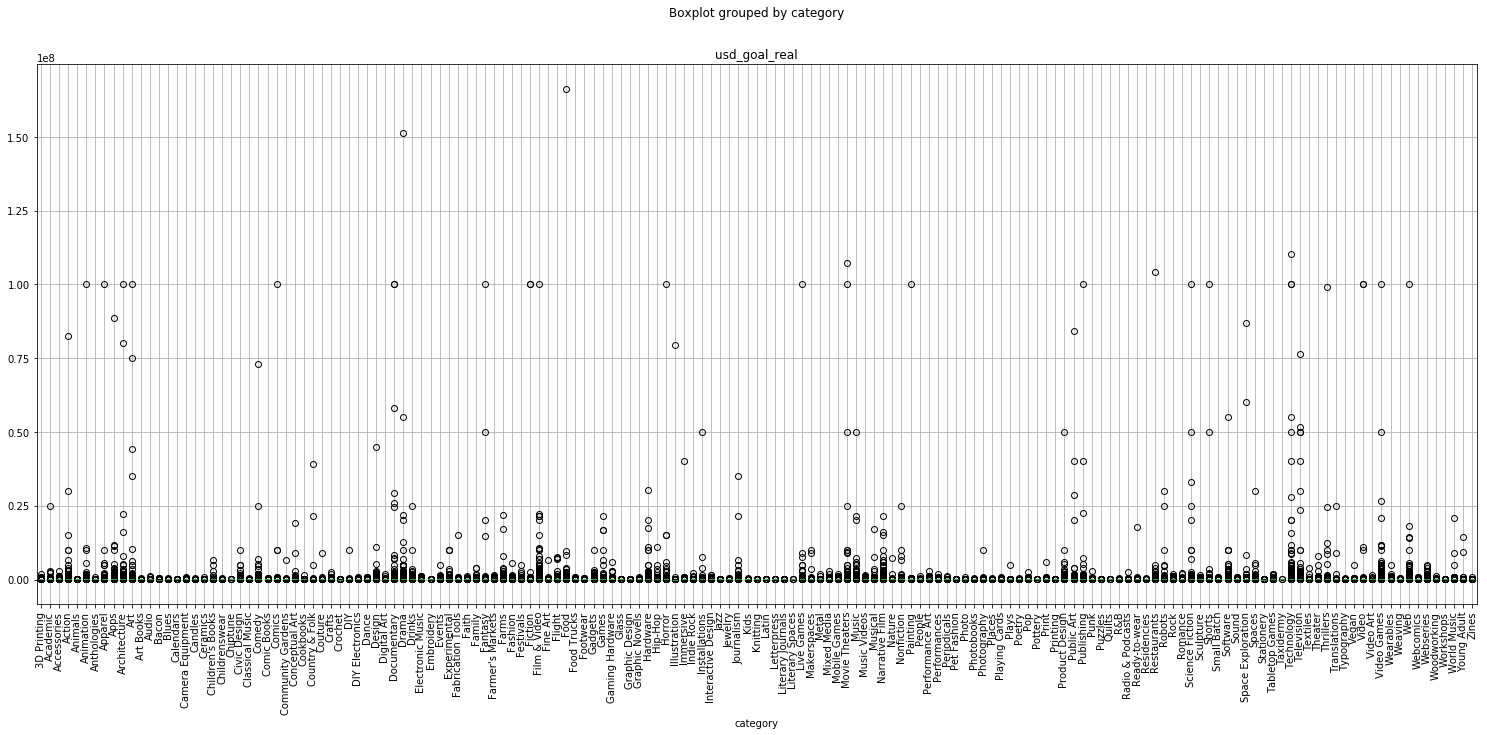

In [49]:
#con outliers
kickstarter_2018.boxplot(column='usd_goal_real', by='category', rot=90, figsize = (25,10))

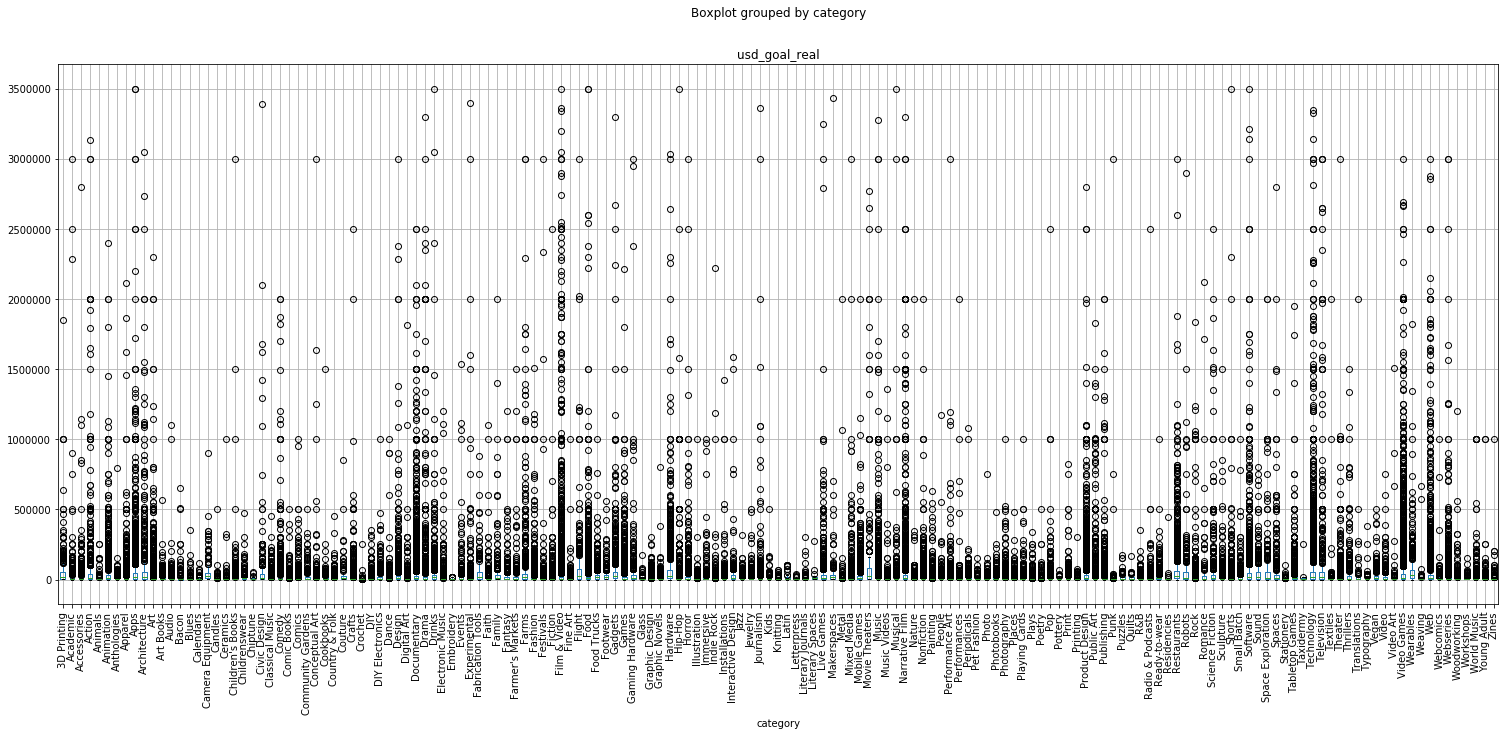

In [50]:
#sin outliers
kickstarter_2018.drop(outliers.index).boxplot(column='usd_goal_real', by='category', rot=90, figsize = (25,10))